## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns

In [24]:
# Creating a dictionary of file names and df names to faciliate importing

# datasets_dict = {'bom.movie_gross':'bom_movie_gross','imdb.name.basics':'imdb_name_basics',
#                  'imdb.title.akas':'imdb_title_akas','imdb.title.basics':'imdb_title_basics',
#                  'imdb.title.crew':'imdb_title_crew','imdb.title.principals':'imdb_title_principals',
#                  'imdb.title.ratings':'imdb_title_ratings','tmdb.movies':'tmdb_movies',
#                  'tn.movie_budgets':'tn_movie_budgets'}

# def import_datasets(key, value):
#     value = pd.read_csv(f'./zippedData/{key}.csv.gz', compression='gzip', 
#                                  header=0, sep=',', quotechar='"')
#     return value
 
# for key, value in datasets_dict.items():
#     import_datasets(key, value)    

9 `CSV` datasets

In [28]:
bom_movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')
imdb_name_basics = pd.read_csv('zippedData/imdb.name.basics.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')
imdb_title_akas = pd.read_csv('zippedData/imdb.title.akas.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')
imdb_title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')
imdb_title_crew = pd.read_csv('zippedData/imdb.title.crew.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')
imdb_title_principals = pd.read_csv('zippedData/imdb.title.principals.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')
imdb_title_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')
tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')

2 `TSV` datasets

In [29]:
rt_movie_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', compression='gzip', 
                                 header=0, sep='\t', encoding='ISO-8859-1', quotechar='"')

rt_reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', compression='gzip', 
                                 header=0, sep='\t', encoding='ISO-8859-1', quotechar='"')

## EDA on `bom_movie_gross`

In [37]:
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


### Info 
#### Missing Values
* ~ 1300 missing in Foreign Gross and convert to float
* ~ 30 in domestic gross (already float)
* Studio is missing 5 values, may not be important

In [38]:
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Set _index_ to movie title

In [39]:
bom_movie_gross.set_index(['title'], inplace=True)

__Domestic Gross__ 
_Top 5_

Divide column by 1 million to makes totals easier to evaluate

In [40]:
bom_movie_gross['domestic_gross_mm'] = bom_movie_gross['domestic_gross'] / 1000000

In [41]:
bom_movie_gross.sort_values(by='domestic_gross_mm', ascending=False)[:5]

,studio,domestic_gross,foreign_gross,year,domestic_gross_mm
title,,,,,
Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015,936.7
Black Panther,BV,700100000.0,646900000,2018,700.1
Avengers: Infinity War,BV,678800000.0,"1,369.5",2018,678.8
Jurassic World,Uni.,652300000.0,"1,019.4",2015,652.3
Marvel's The Avengers,BV,623400000.0,895500000,2012,623.4


If over 1 billion, total is annotated as such `"1,131.6"` see foreign gross for Star Wars from [Box Office Mojo](https://www.boxofficemojo.com/title/tt2488496/?ref_=bo_se_r_8).

__Foreign Gross__

_Cannot sort because dtype is object_

Additionally, scale needs to be adjusted, to the same way `domestic_gross` is annotated, so that data can be analyzed on the same scale. 

In [42]:
bom_movie_gross.sort_values(by='foreign_gross', ascending=False)[:5]

,studio,domestic_gross,foreign_gross,year,domestic_gross_mm
title,,,,,
Life's a Breeze,Magn.,3500.0,99700,2014,0.0035
The East,FoxS,2300000.0,99700,2013,2.3000
White Lion,Scre.,NaN,99600,2010,NaN
A United Kingdom,FoxS,3900000.0,9900000,2017,3.9000
Le Havre,Jan.,612000.0,9900000,2011,0.6120


_These are the 5 films that had foreign gross > 1 billion_

In [44]:
# filter foreign gross over 1 billion
bill_filt = bom_movie_gross['foreign_gross'].str.contains(',', na=False)
bom_movie_gross[bill_filt]

,studio,domestic_gross,foreign_gross,year,domestic_gross_mm
title,,,,,
Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015,936.7
Jurassic World,Uni.,652300000.0,"1,019.4",2015,652.3
Furious 7,Uni.,353000000.0,"1,163.0",2015,353.0
The Fate of the Furious,Uni.,226000000.0,"1,010.0",2017,226.0
Avengers: Infinity War,BV,678800000.0,"1,369.5",2018,678.8


#### Create Python Script
* Checks if value is a string 
* If True, check for comma. 
* If True remove comma and convert to float. 
* If False, return float and divide by 1 million 
* Otherwise the value is numeric.

Once column is converted to floats all in the same decimal level, then they can be divided by 1 million to get correct scalling of foreign_gross. 

This function could be called clean_convert_gross.

In [45]:
from clean_data import *

In [46]:
bom_movie_gross['foreign_gross_mm'] = bom_movie_gross['foreign_gross'].apply(clean_convert_gross)

In [47]:
bom_movie_gross.head()

,studio,domestic_gross,foreign_gross,year,domestic_gross_mm,foreign_gross_mm
title,,,,,,
Toy Story 3,BV,415000000.0,652000000,2010,415.0,652.0
Alice in Wonderland (2010),BV,334200000.0,691300000,2010,334.2,691.3
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,296.0,664.3
Inception,WB,292600000.0,535700000,2010,292.6,535.7
Shrek Forever After,P/DW,238700000.0,513900000,2010,238.7,513.9


Sort by new column `foreign_gross_mm` to get top 5 foreign gross.

In [48]:
bom_movie_gross.sort_values(by='foreign_gross_mm', ascending=False)[:5]

,studio,domestic_gross,foreign_gross,year,domestic_gross_mm,foreign_gross_mm
title,,,,,,
Avengers: Infinity War,BV,678800000.0,"1,369.5",2018,678.8,1369.5
Furious 7,Uni.,353000000.0,"1,163.0",2015,353.0,1163.0
Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015,936.7,1131.6
Jurassic World,Uni.,652300000.0,"1,019.4",2015,652.3,1019.4
The Fate of the Furious,Uni.,226000000.0,"1,010.0",2017,226.0,1010.0


Create a `total_gross` column

In [49]:
bom_movie_gross['total_gross'] = bom_movie_gross['domestic_gross_mm'] + bom_movie_gross['foreign_gross_mm']

In [50]:
bom_movie_gross.sort_values(by='total_gross', ascending=False)[:5]

,studio,domestic_gross,foreign_gross,year,domestic_gross_mm,foreign_gross_mm,total_gross
title,,,,,,,
Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015,936.7,1131.6,2068.3
Avengers: Infinity War,BV,678800000.0,"1,369.5",2018,678.8,1369.5,2048.3
Jurassic World,Uni.,652300000.0,"1,019.4",2015,652.3,1019.4,1671.7
Marvel's The Avengers,BV,623400000.0,895500000,2012,623.4,895.5,1518.9
Furious 7,Uni.,353000000.0,"1,163.0",2015,353.0,1163.0,1516.0


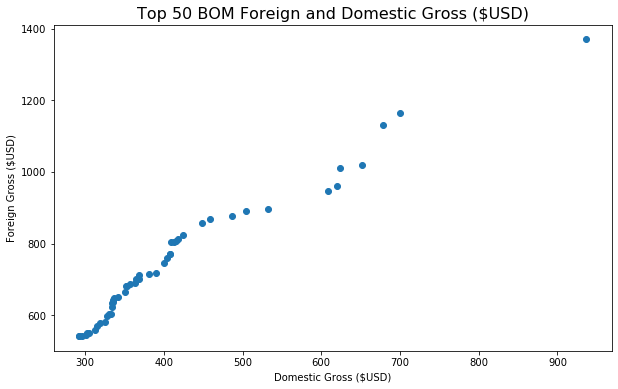

In [51]:
# plot a basic graph showing top 50 total grossing movies
x = bom_movie_gross['domestic_gross_mm'].sort_values(ascending=False)[:50]
y = bom_movie_gross['foreign_gross_mm'].sort_values(ascending=False)[:50]

plt.figure(figsize=(10,6))

plt.scatter(x, y)
plt.xlabel('Domestic Gross ($USD)')
plt.ylabel('Foreign Gross ($USD)')
plt.title('Top 50 BOM Foreign and Domestic Gross ($USD)', fontsize=16)
plt.show();

### Categorizing the genre variable in the IMDB dataset.  The original genres classification contained 1085 
### unique classifications.  These are combinations of certain basic classifications.  Here creating non-mutually 
### exclusive genre classifications.

In [30]:
imdb_title_basics['genres'].nunique()

1085

In [31]:
imdb_title_basics['genres']

0           Action,Crime,Drama
1              Biography,Drama
2                        Drama
3                 Comedy,Drama
4         Comedy,Drama,Fantasy
                  ...         
146139                   Drama
146140             Documentary
146141                  Comedy
146142                     NaN
146143             Documentary
Name: genres, Length: 146144, dtype: object

In [32]:
#creating a list of all genres
list_of_genres = list(imdb_title_basics['genres'])

#python is interpreting nan as a float which prevents us iterating over this entries with string methods
# imdb_title_basics['genres'].isna().sum()
#Using the isinstance to get around this problem
list_of_genres2 = []

for a in range(0, len(list_of_genres)):
    if isinstance(list_of_genres[a], str):
        list_of_genres2.append(list_of_genres[a])

#Multiple entries are seperated by commas. Using split function to make each genre an individual entry.
list_of_genres3 = []
for a in range(0, len(list_of_genres2)):
    list_of_genres3.extend(list_of_genres2[a].split(','))

#Using set function to get the list of unique genres    
unique_genres = set(list_of_genres3)

unique_genres

{'Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western'}

In [33]:
#Using the unique_genres list to create the non-mutually exclusive variables

for genre in unique_genres:
    imdb_title_basics[f'{genre}_movie'] = imdb_title_basics['genres'].str.contains(f'{genre}')

In [34]:
imdb_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Romance_movie,Short_movie,Thriller_movie,History_movie,...,Adult_movie,Talk-Show_movie,Action_movie,War_movie,Sci-Fi_movie,Fantasy_movie,News_movie,Music_movie,Game-Show_movie,Musical_movie
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
